# Problem Statement: 
    
    CREDIT CARD FRAUD DETECTION

Build a machine learning model to identify fraudulent credit card transactions.Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine. Evaluate the model's performance using metrics like precision, recall,and F1-score,
and consider techniques like oversampling or
undersampling for improving results.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



# 🔍 Exploratory Data Analysis¶


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Cheking percent of missing values in columns
missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [9]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

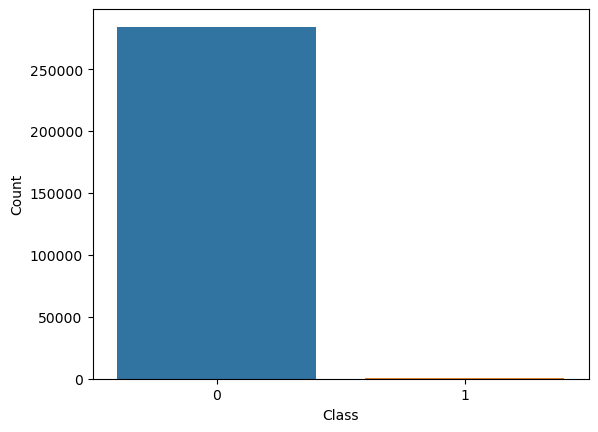

In [10]:
# Plot a bar plot to visualize the distribution
sns.countplot(df['Class']) 
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

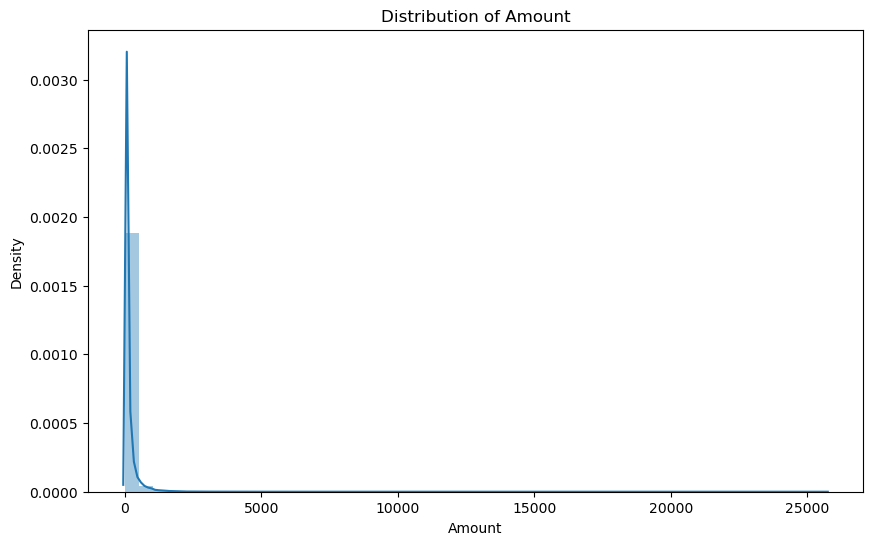

In [11]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution of Amount')
plt.show()

In [12]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

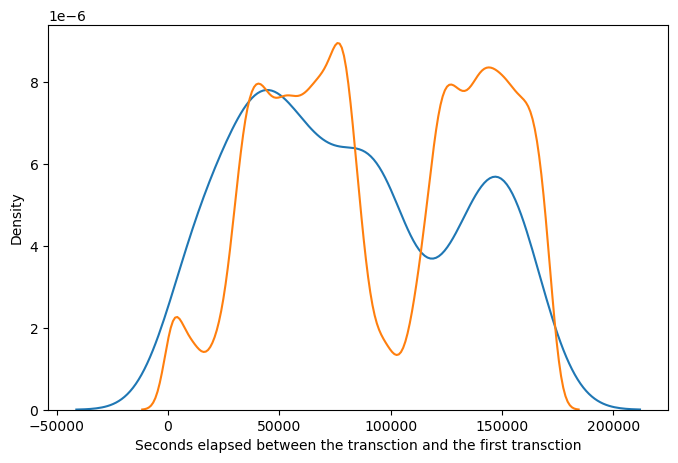

In [13]:
# Distribution plot
plt.figure(figsize=(8,5))
dp= sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
dp = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
dp.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

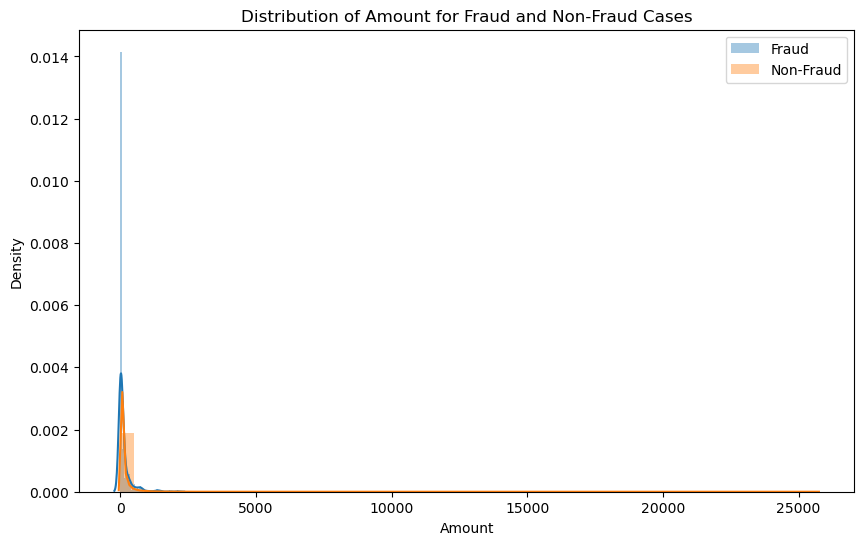

In [14]:
fraud_cases = df[df['Class'] == 1]
non_fraud_cases = df[df['Class'] == 0]

plt.figure(figsize=(10, 6))
sns.distplot(fraud_cases['Amount'], label='Fraud')
sns.distplot(non_fraud_cases['Amount'], label='Non-Fraud')
plt.xlabel('Amount')
plt.legend()
plt.title('Distribution of Amount for Fraud and Non-Fraud Cases')
plt.show()

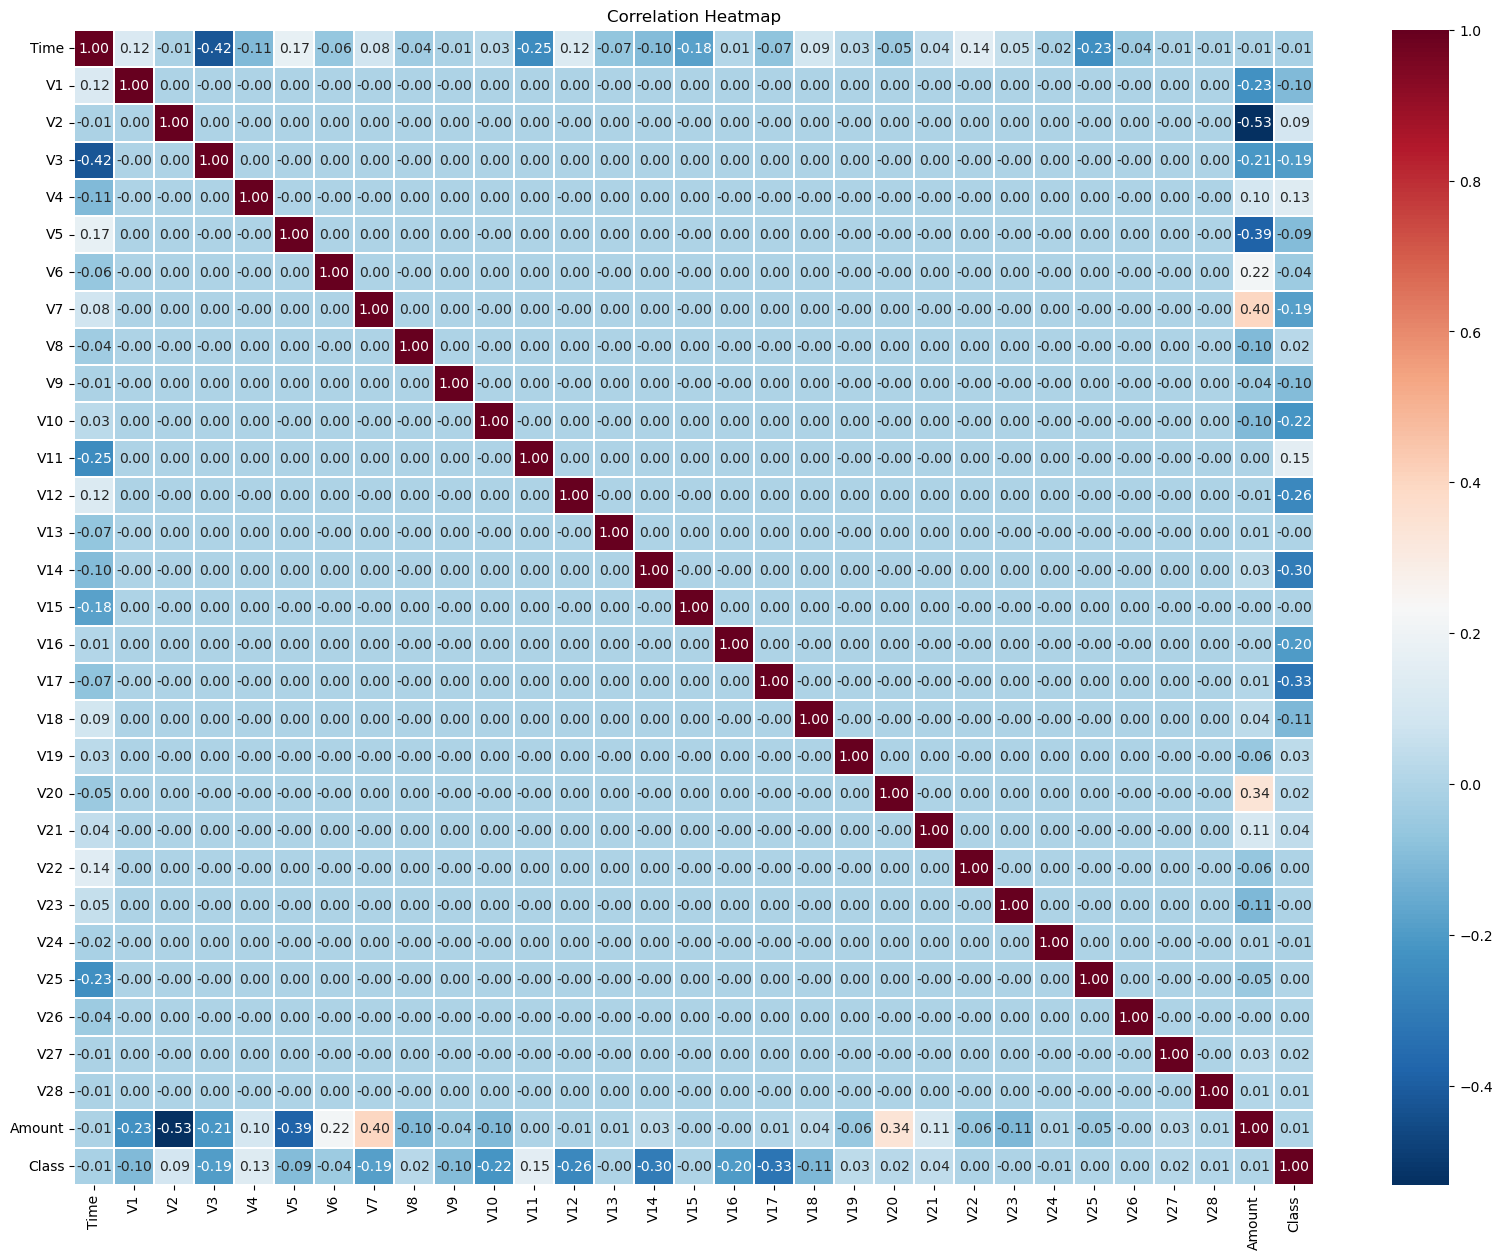

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, fmt='.2f', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

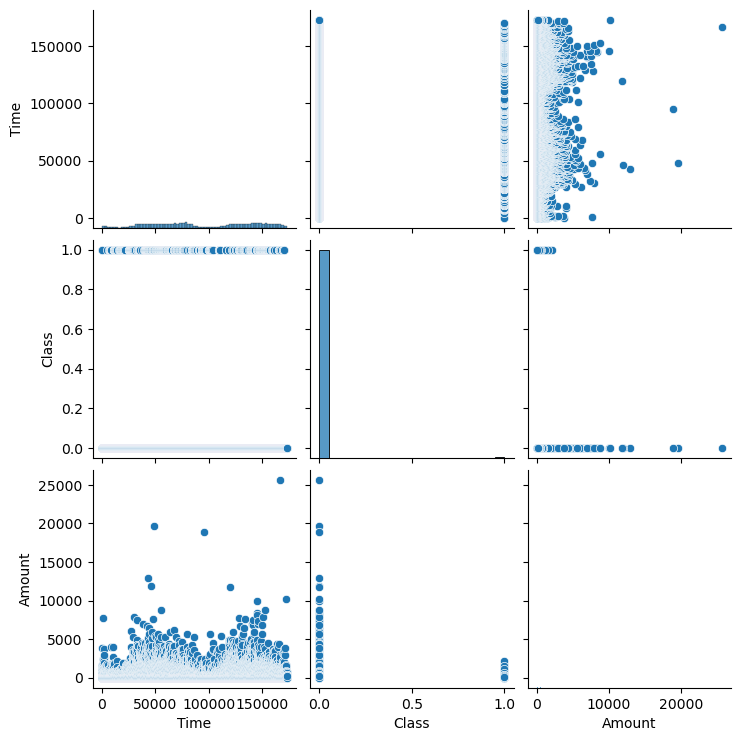

In [16]:
sns.pairplot(df[['Time','Class', 'Amount']], diag_kind="hist")

{'whiskers': [<matplotlib.lines.Line2D at 0x22fb855f160>,
 'caps': [<matplotlib.lines.Line2D at 0x22fb855f700>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fb8554e50>],
 'medians': [<matplotlib.lines.Line2D at 0x22fb855fca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fb855ff70>],
 'means': []}

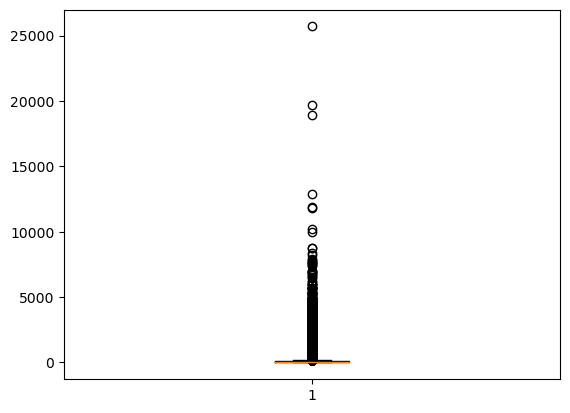

In [17]:
plt.boxplot(df['Amount'])


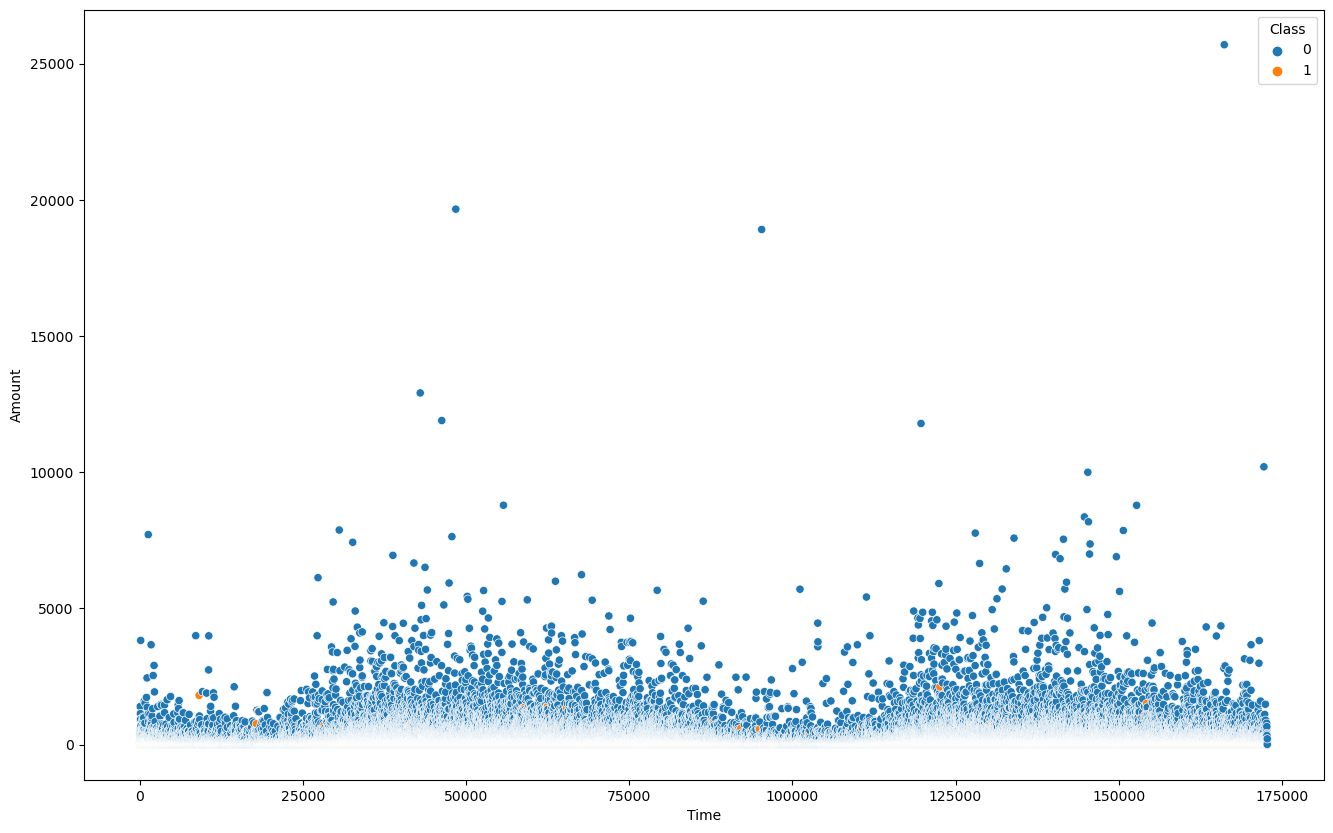

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="Time", y='Amount', data=df, hue = 'Class')
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_df is your DataFrame

# List of variables to visualize
variables_to_plot = ['V20', 'V7']

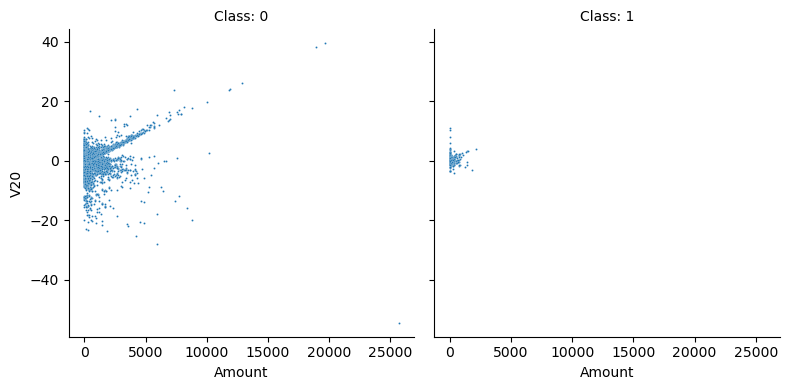

In [23]:
# Create a FacetGrid with scatter plots
g = sns.FacetGrid(df, col='Class', height=4)
g.map_dataframe(sns.scatterplot, x='Amount', y=variables_to_plot[0], s=2)
g.set_axis_labels('Amount', variables_to_plot[0])
g.set_titles("Class: {col_name}")
g.fig.tight_layout()
plt.show()

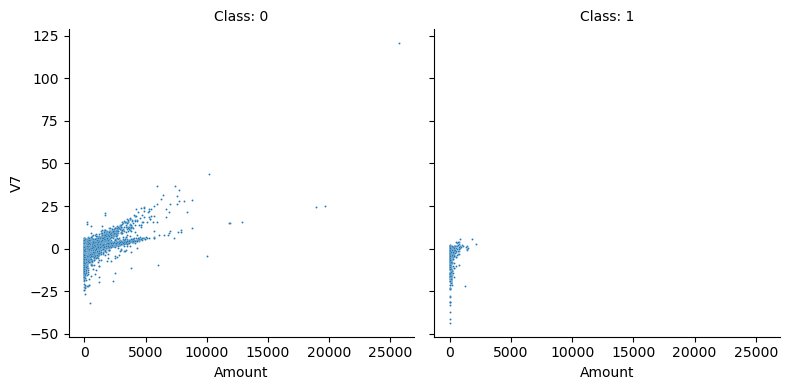

In [24]:
g = sns.FacetGrid(df, col='Class', height=4)
g.map_dataframe(sns.scatterplot, x='Amount', y=variables_to_plot[1], s=2)
g.set_axis_labels('Amount', variables_to_plot[1])
g.set_titles("Class: {col_name}")
g.fig.tight_layout()
plt.show()


# Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['Class'], axis=1)

In [27]:
y = df['Class']

In [28]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

Checking the Skewness

In [29]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [30]:
# Instantiate the Scaler
scaler = StandardScaler()

In [31]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [32]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


In [33]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Assuming cols is a list of column names
cols = X_train.columns


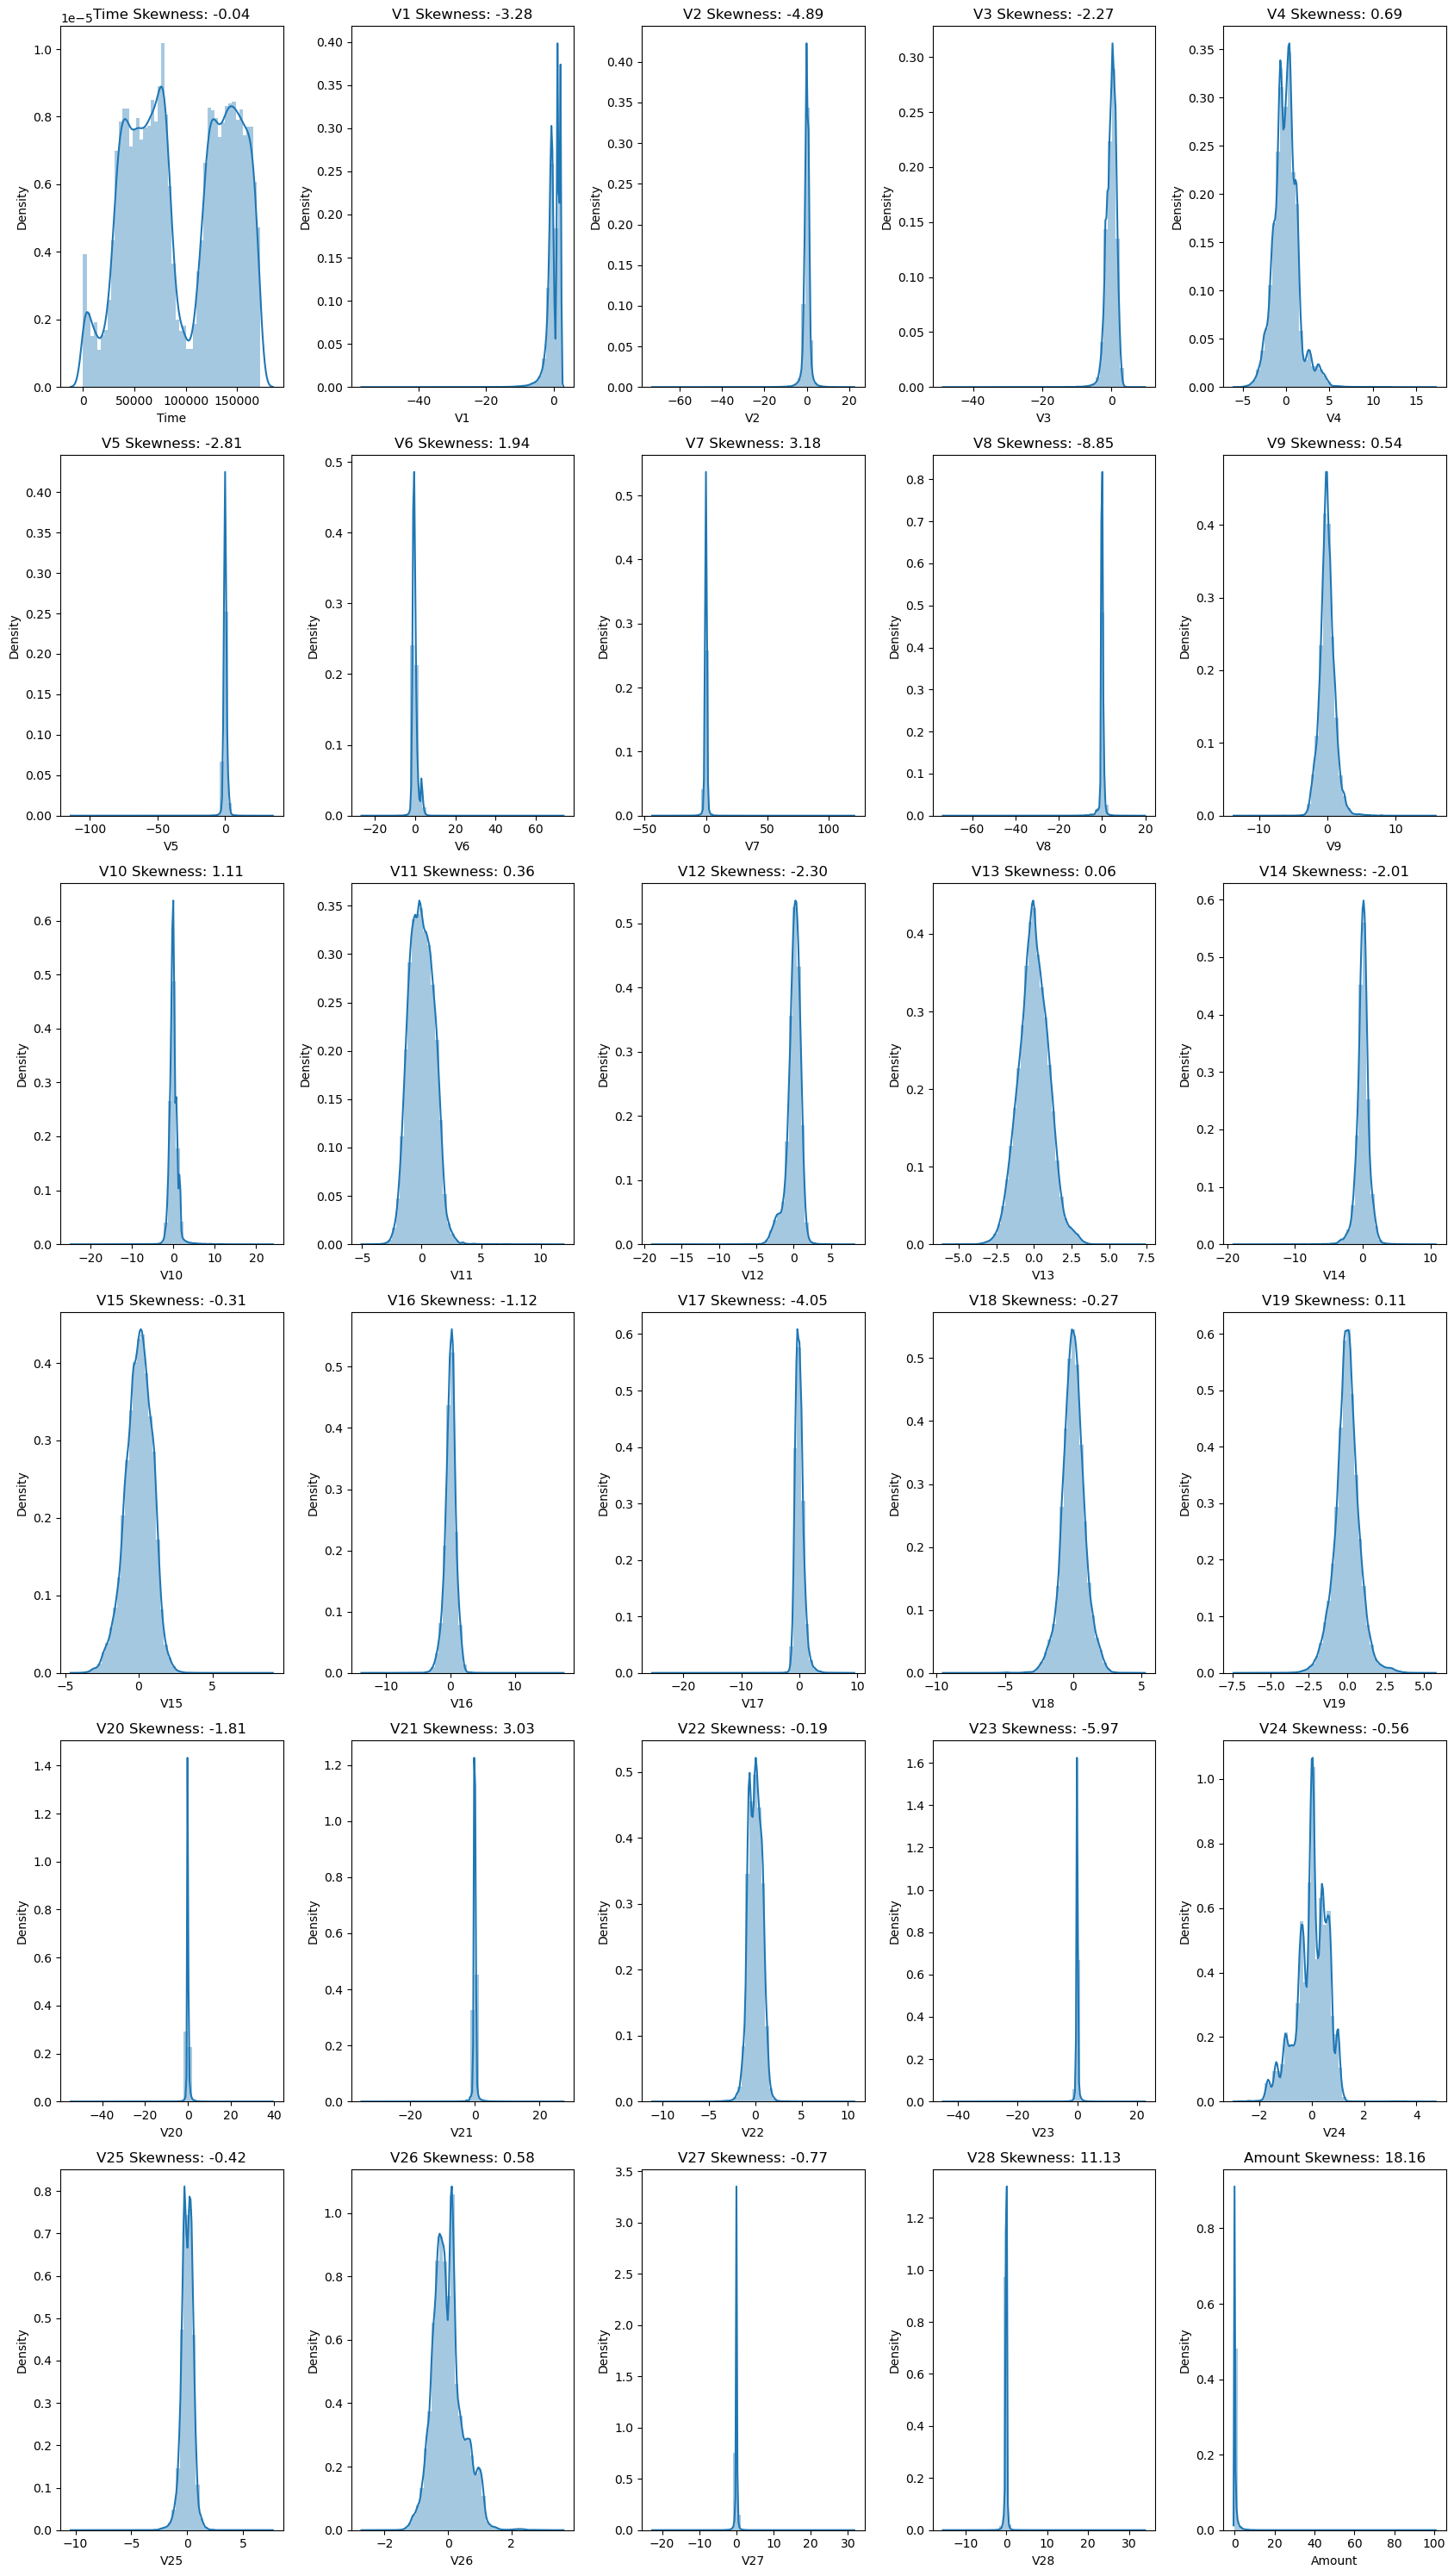

In [34]:
# Plotting the distribution of the variables (skewness)
num_rows = len(cols) // 5 + (len(cols) % 5 > 0)
plt.figure(figsize=(17, 5 * num_rows))

for k, col in enumerate(cols, start=1):
    plt.subplot(num_rows, 5, k)
    sns.distplot(X_train[col])
    plt.title(col + ' Skewness: {:.2f}'.format(X_train[col].skew()))

plt.tight_layout()
plt.show()


# Model Building¶

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler


In [43]:
# Apply oversampling using RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)


In [44]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [46]:
# Fit the model on the oversampled training data
rf_model.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions on the test data
y_pred_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability of being fraudulent
threshold = 0.5
y_pred_binary = (y_pred_probs > threshold).astype(int)

In [48]:
# Evaluate the model's performance using classification metrics
classification_rep = classification_report(y_test, y_pred_binary)

print("Random Forest Classification Report:")
print(classification_rep)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.72      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



# Conclusion :
    
1.Load and preprocess the data: Load the credit card transaction dataset using Pandas. Split the features (X) and the target variable (y), where X contains the transaction features and y contains the labels indicating whether a transaction is fraudulent or not.

2.Handle class imbalance: Use the RandomOverSampler (or RandomUnderSampler) from the imblearn library to handle class imbalance by oversampling the minority class or undersampling the majority class.

3.Split the dataset: Split the resampled data into training and testing sets using train_test_split.

4.Preprocess the data (normalize): Normalize the features using StandardScaler to bring all features to a similar scale. This helps in improving the convergence of machine learning algorithms.

5.Train a classification algorithm: Choose a classification algorithm such as Logistic Regression or Random Forests. Uncomment the appropriate lines to select the desired algorithm.

6.Evaluate the model's performance: Predict the labels for the test set using the trained model. Calculate classification metrics such as precision, recall, and F1-score using the classification_report function from sklearn.metrics.